In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from math import sin, cos, sqrt, atan2, radians

In [3]:
import seaborn as sns
import folium # создание географических карт

In [4]:
# машинное обучение
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
pd.set_option('display.max_colwidth', None) # текст в ячейке отображается полностью вне зависимости от длины

In [6]:
# в файле 'csv-28265.csv' хранятся необработанные данные о квартирах на продажу
# загружаем датасет из файла csv

df = pd.read_csv('csv-28265.csv', sep=";")

In [7]:
# посмотрим на колонки датасета df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Название                            12080 non-null  object 
 1   Цена                                12080 non-null  int64  
 2   Дата                                12080 non-null  object 
 3   Телефон                             12080 non-null  int64  
 4   Оператор                            12080 non-null  object 
 5   Контактное лицо (автор объявления)  11935 non-null  object 
 6   Тип автора                          12080 non-null  object 
 7   Регион                              12080 non-null  object 
 8   Город                               12080 non-null  object 
 9   Метро/Район                         10795 non-null  object 
 10  Адрес                               11992 non-null  object 
 11  Описание                            11977

In [8]:
df.head(5)

,Название,Цена,Дата,Телефон,Оператор,Контактное лицо (автор объявления),Тип автора,Регион,Город,Метро/Район,...,Источник,lat,lng,Персона для контактов,Доп.параметры,URL,Ссылки на картинки,Регион мобильного телефона,Номер подменён,"Расстояние до метро, км"
0,"2-к. квартира, 45,1 м², 4/5 эт.",6450000,2025-04-30 12:13:30,89586045284,МТТ,Этажи Санкт-Петербург,Агентство,Санкт-Петербург,Санкт-Петербург,Международная,...,avito.ru,59.875506,30.395549,NaN,Площадь кухни=6|Тип объявления=Продам|Количество комнат=2|Вид объекта=Вторичка|Тип дома=Панельный|Этаж=4|Этажей в доме=5|Площадь=45,https://www.avito.ru/sankt-peterburg/kvartiry/2-k._kvartira_451_m_45_et._7353447103,"https://50.img.avito.st/image/1/1.45F9Wra5T3hL7c11N3G2iA77TX7D-81uS_ZNes_vS3o.SbjYrYjzvgCpod4hk0gLXtWqTfAa59s_mcGNc_OaHNo,https://00.img.avito.st/image/1/1._3jrNLa5U5Hdg9GcmVvVYJiVUZdVldGH3ZhRk1mBV5M.ud2DBuJ5GwO_y32Ot27-oOcfOFlZTJGcfxlcRQSfTRk,https://10.img.avito.st/image/1/1.niBt07a5MslbZLDEXcWiOR5yMM_TcrDfW38wy99mNss.r8kff0tyjeGJd3TaFxzAho_yUkt7-CSz2bHZW65pcHM,https://70.img.avito.st/image/1/1.-6pv37a5V0NZaNVOFbCMsBx-VUXRftVVWXNVQd1qU0E.pTiGecUyj67bvpUqcNJp5HvfrFRquD_qCdexMGTllGI,https://80.img.avito.st/image/1/1.z3w3LLa5Y5UBm-GYJWeuZESNYZOJjeGDAYBhl4WZZ5c.tHw1joKnS5GCkKC63AC8v9blud9-elu208HRtCqkcrQ,https://10.img.avito.st/image/1/1.4Qogxra5TeMWcc_ubqGfElNnT-WeZ8_1FmpP4ZJzSeE.B95BsFyorkAMgmfpkfjT9aOp0TCpayleG1DJkCuGwiw,https://10.img.avito.st/image/1/1.53wbPLa5S5Uti8mYWVe2ZWidSZOlncmDLZBJl6mJT5c.fAEy3s7-3B4hamel5kXBl3GDoBfi7pNC7eqPJgXMDVU,https://50.img.avito.st/image/1/1.Snw6H7a55pUMqGSYIipmZEm-5JOEvmSDDLPkl4iq4pc.Sn2b2AutkkEcCoQYEQ7qZQquw-UXenSccqWXjKHwO0Q",г. Санкт-Петербург и Ленинградская область,да,1.1000000238419
1,"1-к. квартира, 30,7 м², 4/5 эт.",5500000,2025-04-30 12:13:21,89587886359,МТТ,Этажи Санкт-Петербург,Агентство,Санкт-Петербург,Санкт-Петербург,Пионерская,...,avito.ru,59.998765,30.313883,NaN,Площадь кухни=6|Жилая площадь=17|Тип объявления=Продам|Количество комнат=1|Вид объекта=Вторичка|Тип дома=Кирпичный|Этаж=4|Этажей в доме=5|Площадь=30,https://www.avito.ru/sankt-peterburg/kvartiry/1-k._kvartira_307_m_45_et._7353774038,"https://90.img.avito.st/image/1/1.lii9aLa5OsGL37jMnRLpMM7JOMcDybjXi8Q4ww_dPsM.oE1Nnc1OTg6_j77lPQsUlxPZBCLa28jjx1VWwTT0yxo,https://60.img.avito.st/image/1/1.hLSZhra5KF2vMapQnYyprOonKlsnJ6pLryoqXyszLF8.Z3ARfyQmQmeKqJOkS2ZYMf7ZcPNtjFmHS7LVEQnYeNA,https://30.img.avito.st/image/1/1.CBlE77a5pPByWCb9WPcmATdOpvb6TibmckOm8vZaoPI.Z3ImbBjb2g-m7LLkcbvhFzCQ_7W6RujYbxDts_pqSiI,https://10.img.avito.st/image/1/1.MWFTTra5nYhl-R-FPU4OeCDvn47t7x-eZeKfiuH7mYo.Ix4CqJVsA3ERx6GbGbNVmJy9zRPwt3XzwXw-XVgFrNQ,https://80.img.avito.st/image/1/1.bMTaJLa5wC3sk0IgjnVS3amFwitkhUI77IjCL2iRxC8.qiiLFuXDELMbkmSwKGfammsQzzAluqvDbTUJ2u3wmdA,https://70.img.avito.st/image/1/1.MF0EVra5nLQy4R65aGphRHf3nrK69x6iMvqetrbjmLY.SoIsDWhUsQJG-jLf09puC6UuqZGPllnacojOKifI2kM,https://50.img.avito.st/image/1/1.9MyZr7a5WCWvGNoo_dyL1OoOWiMnDtozrwNaJysaXCc.n9L9nwijJdkg3_BnT8j2sC0e1ji4B7Hqucjau7Ae1Vs,https://20.img.avito.st/image/1/1.bbX8tba5wVzKAkNRquhArY8Uw1pCFENKyhnDXk4AxV4.R3FJ5LjNZeHfMSyTLdpzQ2ZZU2aqEN2N0FM8yJ0Ls9c,https://40.img.avito.st/image/1/1.a5fy2ra5x37EbUVzqIMdjYF7xXhMe0VoxHbFfEBvw3w.Zw0ouX74lg5s-PdANCmNB0EUDK49vMpi96r1k2h9n7I,https://60.img.avito.st/image/1/1.T3kNNLa545A7g2GdHxViYX6V4ZazlWGGO5jhkr-B55I.BAkN7fgyvOhwO7jDaqa_UeRQICtvZ5ijPHxicdRjI_c,https://60.img.avito.st/image/1/1.oSPTUra5Dcrl5Y_HnUTaOaDzD8xt84_c5f4PyGHnCcg.IJC1FxNxmSDrVdINYr4J1_UY3mo44L7-2DwUGQ_hdXQ,https://10.img.avito.st/image/1/1.rMS6cLa5AC2Mx4Ig7nbS3MnRAisE0YI7jNwCLwjFBC8.JNVImZbIsTIuiXSmasgspGSGupy-hkvK4y4_blgI_y4,https://10.img.avito.st/image/1/1.vhd9dba5Ev5LwpDzDVPuDg7UEPjD1JDoS9kQ_M_AFvw.EuKWkkvDQ8kt27Q15uUPNFU0_zb1dYpBelFWomV2UEA,https://00.img.avito.st/image/1/1.BbWsXba5qVya6itRqnV4rd_8q1oS_CtKmvGrXh7orV4.DlvQWeVLurFnbs8Q9VvR76jPhLevcgq9OLrva2rx-TI,https://50.img.avito.st/image/1/1.U_dP2La5_x55b30TZZFz7jx5_RjxeX0IeXT9HP1t-xw.JWJqZ1SL4LlFkyUpJEwZRs9qk3VIX8Lk7JtbJ2RD9NY,https://40.img.avito.st/image/1/1.XbU

In [9]:
# Видим, что важная информация о квартирах на продажу хранится в колонке 'Доп.параметры'
df['Доп.параметры'].head(5)

,Доп.параметры
0,Площадь кухни=6|Тип объявления=Продам|Количество комнат=2|Вид объекта=Вторичка|Тип дома=Панельный|Этаж=4|Этажей в доме=5|Площадь=45
1,Площадь кухни=6|Жилая площадь=17|Тип объявления=Продам|Количество комнат=1|Вид объекта=Вторичка|Тип дома=Кирпичный|Этаж=4|Этажей в доме=5|Площадь=30
2,Площадь кухни=6|Жилая площадь=32|Тип объявления=Продам|Количество комнат=2|Вид объекта=Вторичка|Тип дома=Панельный|Этаж=4|Этажей в доме=9|Площадь=51
3,Жилая площадь=10|Тип объявления=Продам|Количество комнат=Студия|Вид объекта=Вторичка|Тип дома=Монолитно-кирпичный|Этаж=14|Этажей в доме=25|Площадь=24
4,Площадь кухни=8|Срок сдачи=1987|Тип объявления=Продам|Количество комнат=2|Вид объекта=Вторичка|Тип дома=Панельный|Этаж=1|Этажей в доме=5|Площадь=50


In [10]:
# Извлекаем информацию из колонки 'Доп.параметры'

# Для этого сперва заменяем все '|' на '='
df['Доп.параметры'] = df['Доп.параметры'].str.replace('|', '=')
df['Доп.параметры'] = df['Доп.параметры'].str.split('=')

# Составляем словарь с названием параметра квартиры и его значением
df['Доп.параметры']=df['Доп.параметры'].apply(lambda x: dict(zip(x[::2],x[1::2])))
df['Доп.параметры'].head(5)

,Доп.параметры
0,"{'Площадь кухни': '6', 'Тип объявления': 'Продам', 'Количество комнат': '2', 'Вид объекта': 'Вторичка', 'Тип дома': 'Панельный', 'Этаж': '4', 'Этажей в доме': '5', 'Площадь': '45'}"
1,"{'Площадь кухни': '6', 'Жилая площадь': '17', 'Тип объявления': 'Продам', 'Количество комнат': '1', 'Вид объекта': 'Вторичка', 'Тип дома': 'Кирпичный', 'Этаж': '4', 'Этажей в доме': '5', 'Площадь': '30'}"
2,"{'Площадь кухни': '6', 'Жилая площадь': '32', 'Тип объявления': 'Продам', 'Количество комнат': '2', 'Вид объекта': 'Вторичка', 'Тип дома': 'Панельный', 'Этаж': '4', 'Этажей в доме': '9', 'Площадь': '51'}"
3,"{'Жилая площадь': '10', 'Тип объявления': 'Продам', 'Количество комнат': 'Студия', 'Вид объекта': 'Вторичка', 'Тип дома': 'Монолитно-кирпичный', 'Этаж': '14', 'Этажей в доме': '25', 'Площадь': '24'}"
4,"{'Площадь кухни': '8', 'Срок сдачи': '1987', 'Тип объявления': 'Продам', 'Количество комнат': '2', 'Вид объекта': 'Вторичка', 'Тип дома': 'Панельный', 'Этаж': '1', 'Этажей в доме': '5', 'Площадь': '50'}"


In [11]:
# Создаем новые колонки в датасете df со значениями соответствующих параметров из колонки 'Доп.параметры'
# В тех случаях когда значение параметра отсутствует в колонке 'Доп.параметры' в соответствующей новой колонке указывается его значение NaN

df['Площадь кухни']=df['Доп.параметры'].apply(lambda x: x['Площадь кухни'] if 'Площадь кухни' in x else np.nan)
df['Жилая площадь']=df['Доп.параметры'].apply(lambda x: x['Жилая площадь'] if 'Жилая площадь' in x else np.nan)
df['Вид объекта']=df['Доп.параметры'].apply(lambda x: x['Вид объекта'] if 'Вид объекта' in x else np.nan)
df['Тип дома']=df['Доп.параметры'].apply(lambda x: x['Тип дома'] if 'Тип дома' in x else np.nan)
df['Срок сдачи']=df['Доп.параметры'].apply(lambda x: x['Срок сдачи'] if 'Срок сдачи' in x else np.nan)
df['Название ЖК']=df['Доп.параметры'].apply(lambda x: x['Название ЖК'] if 'Название ЖК' in x else np.nan)
df['Количество комнат']=df['Доп.параметры'].apply(lambda x: x['Количество комнат'] if 'Количество комнат' in x else np.nan)
df['Этаж']=df['Доп.параметры'].apply(lambda x: x['Этаж'] if 'Этаж' in x else np.nan)
df['Этажей в доме']=df['Доп.параметры'].apply(lambda x: x['Этажей в доме'] if 'Этажей в доме' in x else np.nan)
df['Площадь']=df['Доп.параметры'].apply(lambda x: x['Площадь'] if 'Площадь' in x else np.nan)

In [12]:
# посмотрим на колонки датасета df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Название                            12080 non-null  object 
 1   Цена                                12080 non-null  int64  
 2   Дата                                12080 non-null  object 
 3   Телефон                             12080 non-null  int64  
 4   Оператор                            12080 non-null  object 
 5   Контактное лицо (автор объявления)  11935 non-null  object 
 6   Тип автора                          12080 non-null  object 
 7   Регион                              12080 non-null  object 
 8   Город                               12080 non-null  object 
 9   Метро/Район                         10795 non-null  object 
 10  Адрес                               11992 non-null  object 
 11  Описание                            11977

In [13]:
# Посмотрим данные в колонке 'Регион'
df['Регион'].unique()

array(['Санкт-Петербург', 'Ленинградская область'], dtype=object)

In [14]:
# Посмотрим данные в колонке 'Город'
df['Город'].unique()

array(['Санкт-Петербург', 'Шушары', 'Сестрорецк', 'Пушкин', 'Парголово',
       'Ломоносов', 'Кронштадт', 'Петергоф', 'Красное Село', 'Колпино',
       'Металлострой', 'Петро-Славянка', 'Понтонный', 'Павловск',
       'Солнечное', 'Сапёрный', 'Песочный', 'Стрельна'], dtype=object)

In [15]:
# Посмотрим данные в колонке 'Категория1'
df['Категория1'].unique()

array(['Недвижимость'], dtype=object)

In [16]:
# Посмотрим данные в колонке 'Категория2'
df['Категория2'].unique()

array(['Квартиры'], dtype=object)

In [17]:
# Посмотрим данные в колонке 'ID на сайте'
df['ID на сайте'].unique()

array(['7353447103', '7353774038', '7353614698', ...,
       '3152402592814344219', '7355037017', '7355787843'], dtype=object)

In [18]:
# Посмотрим данные в колонке 'Вид объекта'
df['Вид объекта'].unique()

array(['Вторичка', 'Новостройка'], dtype=object)

In [19]:
# Уникальные значения и их число в колонке 'Вид объекта'
df['Вид объекта'].value_counts()

,count
Вид объекта,
Вторичка,6247
Новостройка,5833


In [20]:
# Посмотрим данные в колонке 'Тип дома'
df['Тип дома'].unique()

array(['Панельный', 'Кирпичный', 'Монолитно-кирпичный', 'Монолитный', nan,
       'Неизвестный', 'Блочный', 'Сталинский', 'Деревянный'], dtype=object)

In [21]:
df['Тип дома'].value_counts()

,count
Тип дома,
Монолитный,3609
Монолитно-кирпичный,1489
Панельный,1306
Кирпичный,1109
Блочный,64
Сталинский,14
Неизвестный,11
Деревянный,3


In [22]:
# Видно, что в колонке 'Тип дома' очень много значений NaN

np.sum(df['Тип дома'].isna(), axis=0)

np.int64(4475)

In [23]:
# Посмотрим данные в колонке 'Срок сдачи'
df['Срок сдачи'].unique()

array([nan, '1987', 'Сдан 1 кв. 2023', '2023', '1912', '2013', '2024',
       '2017', '2026', '4 кв. 2019', '1 кв. 2022', '4 кв. 2022',
       '4 кв. 2014', '1 кв. 2024', '4 кв. 2020', '2 кв. 2019',
       '3 кв. 2023', '3 кв. 2011', '4 кв. 2024', '1 кв. 2028',
       '1 кв. 2026', '2 кв. 2026', '3 кв. 2025', '3 кв. 2024',
       '3 кв. 2026', '2 кв. 2028', '3 кв. 2022', '2 кв. 2023',
       '4 кв. 2026', '2 кв. 2027', '4 кв. 2023', '4 кв. 2012',
       '4 кв. 2017', '3 кв. 2012', '3 кв. 2015', '2 кв. 2004',
       '2 кв. 2024', '1 кв. 2025', '4 кв. 2029', '2 кв. 2021',
       '4 кв. 2011', '4 кв. 2016', '3 кв. 2018', '4 кв. 2025',
       '4 кв. 2015', '4 кв. 2021', '2 кв. 2025', '2 кв. 2020',
       '4 кв. 2018', '4 кв. 2027', '2 кв. 2015', '3 кв. 2016',
       '3 кв. 2017', '1 кв. 2023', '2 кв. 2016', '1 кв. 2014',
       '1 кв. 2020', '1 кв. 2017', '1969', '2009', '2006', '1989', '2019',
       '2015', '2020', '1990', '2016', '2010', '1872', '1962', '1952',
       '1909', '1899', '2

In [24]:
# в колонке 'Срок сдачи' заменим nan на '1000'

df['Срок сдачи'] = df['Срок сдачи'].fillna('1000')

In [25]:
# в колонке 'Срок сдачи' оставим только год постройки (последние 4 цифры)

df['Срок сдачи']=df['Срок сдачи'].apply(lambda x: x[-4:])
np.sort(df['Срок сдачи'].unique())

array(['1000', '1776', '1777', '1798', '1806', '1809', '1822', '1828',
       '1829', '1830', '1837', '1840', '1846', '1847', '1848', '1854',
       '1858', '1863', '1864', '1866', '1870', '1872', '1873', '1875',
       '1877', '1878', '1880', '1882', '1887', '1890', '1893', '1894',
       '1897', '1899', '1900', '1901', '1902', '1903', '1904', '1906',
       '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914',
       '1915', '1916', '1917', '1919', '1930', '1932', '1933', '1934',
       '1935', '1936', '1938', '1939', '1940', '1950', '1952', '1953',
       '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
      

In [26]:
# Посмотрим данные в колонке 'Название ЖК'
df['Название ЖК'].value_counts()

,count
Название ЖК,
LEGENDA Васильевского,761
Пулково Lake,524
Гранат,485
Аквилон ZALIVE,294
Окла (Okla),240
...,...
у Елагина острова,1
Bereg Курортный,1
ЖК «BEREG.Курортный (БЕРЕГ.Курортный)»,1


In [27]:
# Посмотрим данные в колонке 'Метро/Район'
# Видно, что некоторые значения в колонке 'Метро/Район' - это названия станций метро,
# другие - это названия районов города, также много значений NaN
df['Метро/Район'].unique()

array(['Международная', 'Пионерская', 'Рыбацкое', 'Ладожская',
       'р-н Приморский', 'Парнас', 'Парк Победы', 'р-н Красносельский',
       'Технологический ин-т II', 'Проспект Просвещения', nan, 'Беговая',
       'Улица Дыбенко', 'Озерки', 'Проспект Большевиков', 'Пролетарская',
       'Лесная', 'Купчино', 'Академическая', 'Чкаловская', 'Нарвская',
       'Гражданский проспект', 'Звёздная', 'Проспект Славы',
       'Ленинский проспект', 'Новочеркасская', 'Дунайская',
       'Комендантский проспект', 'Елизаровская', 'Площадь Восстания',
       'Спортивная', 'Автово', 'Чёрная Речка', 'Чернышевская',
       'Московские ворота', 'Звездная', 'Проспект Ветеранов',
       'Электросила', 'Петроградская', 'Фрунзенская', 'Волковская',
       'Удельная', 'Политехническая', 'Балтийская', 'Московская',
       'Черная речка', 'Горьковская', 'Приморская', 'Василеостровская',
       'Шушары', 'Красногвардейский', 'Василеостровский',
       'Площадь Александра Невского', 'Девяткино', 'Выборгский',
 

In [28]:
# Видно, что в колонке 'Метро/Район' много значений NaN

np.sum(df['Метро/Район'].isna(), axis=0)

np.int64(1285)

In [29]:
# Посмотрим данные в колонке 'Расстояние до метро, км'
# Видно, что в колонке "Расстояние до метро, км" очень много нерелевантных значений (текст вместо чисел)

df["Расстояние до метро, км"].apply(lambda x: 1 if x.isalpha() is True else 0).sum()

np.int64(1658)

In [30]:
# в колонке 'Адрес' заменяем NaN на "нет данных"

df['Адрес']=df['Адрес'].fillna("нет данных")
np.sum(df['Адрес'].isna(), axis=0)  # число записей в колонке 'Адрес' с NaN в столбцах

np.int64(0)

In [31]:
# Цена квартиры дана в рублях
# Пересчитаем цену квартиры в миллионах рублей

df["Цена"]=df["Цена"].apply(lambda x: x/(1.e+06)).round(3)
df = df.rename(columns={'Цена': 'Цена (млн руб)'})
df["Цена (млн руб)"].head(5)

,Цена (млн руб)
0,6.45
1,5.50
2,10.00
3,4.70
4,3.20


In [32]:
# Посмотрим данные в колонке 'Количество комнат'
df["Количество комнат"].unique()

array(['2', '1', 'Студия', '3', '5', '4', '6', nan], dtype=object)

In [33]:
np.sum(df['Количество комнат'].isna(), axis=0)  # число записей в колонке 'Количество комнат' с NaN в столбцах

np.int64(28)

In [34]:
# в колонке 'Количество комнат' заменяем NaN на df['Количество комнат'].mode()[0]

df['Количество комнат'].fillna(df['Количество комнат'].mode()[0], inplace=True)
np.sum(df['Количество комнат'].isna(), axis=0)  # число записей в колонке 'Количество комнат' с NaN в столбцах

<ipython-input-34-2300818103>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Количество комнат'].fillna(df['Количество комнат'].mode()[0], inplace=True)


np.int64(0)

In [35]:
df['Количество комнат'].value_counts()

,count
Количество комнат,
1,4141
Студия,3046
2,2919
3,1688
4,217
5,46
6,23


In [36]:
# Видно, что среди данных очень мало 5 и 6-ти комнатных квартир
# Мы их добавляем к 4-х комнатным квартирам

df['Количество комнат'].replace('5', '4', inplace=True)
df['Количество комнат'].replace('6', '4', inplace=True)


In [37]:
# Убеждаемся, что все значение в колонке "Этаж" положительные числа

df["Этаж"]=df["Этаж"].apply(lambda x: abs(int(x)))

In [38]:
# удаляем колонки явно не имеющие отношения к образованию цены квартиры и/или в которых недостаточно данных
del df['Название']
del df['Дата']
del df['Телефон']
del df['Оператор']
del df['Контактное лицо (автор объявления)']
del df['Тип автора']
del df['Регион']
del df['Город']
del df['Описание']
del df['Тип объявления']
del df['Категория1']
del df['Категория2']
del df['ID на сайте']
del df['Источник']
del df['Персона для контактов']
del df['Доп.параметры']
del df['URL']
del df['Ссылки на картинки']
del df['Регион мобильного телефона']
del df['Номер подменён']
del df['Площадь кухни']
del df['Жилая площадь']
del df['Тип дома']
del df['Название ЖК']
del df['Метро/Район']
del df['Расстояние до метро, км']

In [39]:
# посмотрим на оставшиеся колонки
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Цена (млн руб)     12080 non-null  float64
 1   Адрес              12080 non-null  object 
 2   lat                12080 non-null  float64
 3   lng                12080 non-null  float64
 4   Вид объекта        12080 non-null  object 
 5   Срок сдачи         12080 non-null  object 
 6   Количество комнат  12080 non-null  object 
 7   Этаж               12080 non-null  int64  
 8   Этажей в доме      12080 non-null  object 
 9   Площадь            12080 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 943.9+ KB


In [40]:
# ищем полные дубликаты строк
# число полных дубликатов
df.duplicated().sum()

np.int64(712)

In [41]:
# удаляем полные дубликаты
df = df.drop_duplicates(keep="first")
# число полных дубликатов после удаления
df.duplicated().sum()

np.int64(0)

In [42]:
# Присваиваем правильный тип колонкам
df['Срок сдачи']= df["Срок сдачи"].astype(int)
df['Этажей в доме']= df["Этажей в доме"].astype(int)
df['Площадь']= df["Площадь"].astype(float)

<ipython-input-42-3538488396>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Срок сдачи']= df["Срок сдачи"].astype(int)
<ipython-input-42-3538488396>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Этажей в доме']= df["Этажей в доме"].astype(int)
<ipython-input-42-3538488396>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [43]:
# Проверяем типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11368 entries, 0 to 12079
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Цена (млн руб)     11368 non-null  float64
 1   Адрес              11368 non-null  object 
 2   lat                11368 non-null  float64
 3   lng                11368 non-null  float64
 4   Вид объекта        11368 non-null  object 
 5   Срок сдачи         11368 non-null  int64  
 6   Количество комнат  11368 non-null  object 
 7   Этаж               11368 non-null  int64  
 8   Этажей в доме      11368 non-null  int64  
 9   Площадь            11368 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 976.9+ KB


In [44]:
# Создадим еще 3 колонки в датасете:
# "Метро" ближайшая станция метро
# "До метро" расстояние до ближайшей станции метро
# "До центра" расстояние до центра города

# Для этого создаем дополнительный датасет 'метро'

In [45]:
# в файле 'metro.csv' хранятся данные о станциях метро, их географических широте и долготе

metro = pd.read_csv('metro.csv', sep=",")

In [46]:
metro.head(5)

,Метро,lat,lon
0,Девяткино,60.050423,30.442547
1,Гражданский проспект,60.033552,30.418012
2,Академическая,60.012923,30.396409
3,Политехническая,60.009871,30.374419
4,Площадь Мужества,59.999759,30.366116


In [47]:
# создаем новую колонку 'Координаты' в датасете metro, содержащую списки,
# которые содержат широту и долготу точки (станции метро)

metro['Координаты']=metro['lat'].apply(lambda x: str(x)+',')+metro['lon'].apply(lambda x: str(x))
metro['Координаты']=metro['Координаты'].apply(lambda x: x.split(","))

In [48]:
# создаем функцию для вычисления расстояния между двумя точками на карте, используя их координаты

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [49]:
# создаем функцию, которая находит ближайшую станцию метро к выбранной точке

def calculate_station(lat1, lon1):
    metro["Расстояние"]=metro["Координаты"].apply(lambda x: calculate_distance(lat1, lon1, float(x[0]), float(x[1])))
    str2 = metro[metro['Расстояние']==metro['Расстояние'].min()]["Метро"]
    idx = metro[metro['Расстояние']==metro['Расстояние'].min()].index.to_list()[0] #index
    return str2[idx] # ближайшая станция метро

In [50]:
# создаем функцию, которая вычисляет расстояние от выбранной точки до ближайшей станции метро

def calculate_station_distance(lat1, lon1):
    metro["Расстояние"]=metro["Координаты"].apply(lambda x: calculate_distance(lat1, lon1, float(x[0]), float(x[1])))
    return metro['Расстояние'].min()

In [51]:
# В датасете df создаем новое поле 'Координаты', содержащее список,
# который включает широту и долготу координаты точки (квартиры)

df['Координаты']=df['lat'].apply(lambda x: str(x)+',')+df['lng'].apply(lambda x: str(x))
df['Координаты']=df['Координаты'].apply(lambda x: x.split(","))

<ipython-input-51-2709787436>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Координаты']=df['lat'].apply(lambda x: str(x)+',')+df['lng'].apply(lambda x: str(x))
<ipython-input-51-2709787436>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Координаты']=df['Координаты'].apply(lambda x: x.split(","))


In [52]:
# В датасете df cоздаем новую колонку "Метро" и записываем в нее название ближайшей станции метро

df["Метро"]=df["Координаты"].apply(lambda x: calculate_station(float(x[0]), float(x[1])))

In [53]:
# В датасете df создаем новую колонку "До метро" и записываем в нее расстояние от выбранной точки до ближайшей станцию метро

df["До метро"]=df["Координаты"].apply(lambda x: calculate_station_distance(float(x[0]), float(x[1])))

In [54]:
# Выбираем в качестве центра города станцию метро "Гостиный двор-Невский проспект"
# находим ее геокоординаты - широту и долготу - в виде двух чисел формата float

str1 = metro[metro["Метро"]=="Гостиный двор-Невский проспект"]["lat"]   # lat координата Гостинного Двора
idx =  metro[metro["Метро"]=="Гостиный двор-Невский проспект"].index.to_list()[0] #index
lat1=float(str1[idx])

str2 =  metro[metro["Метро"]=="Гостиный двор-Невский проспект"]["lon"]   # lon координата Гостинного Двора
idx =  metro[metro["Метро"]=="Гостиный двор-Невский проспект"].index.to_list()[0] #index
lon1=float(str2[idx])

lat1,lon1

(59.93434350080277, 30.33068678023061)

In [55]:
# В датасете df создаем новую колонку "До центра", в которую записываются расстояния от расположения каждой точки в датасете до центра города

df["До центра"]=df["Координаты"].apply(lambda x: calculate_distance(lat1, lon1, float(x[0]), float(x[1])))

In [56]:
# посмотрим на все колонки датасета df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11368 entries, 0 to 12079
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Цена (млн руб)     11368 non-null  float64
 1   Адрес              11368 non-null  object 
 2   lat                11368 non-null  float64
 3   lng                11368 non-null  float64
 4   Вид объекта        11368 non-null  object 
 5   Срок сдачи         11368 non-null  int64  
 6   Количество комнат  11368 non-null  object 
 7   Этаж               11368 non-null  int64  
 8   Этажей в доме      11368 non-null  int64  
 9   Площадь            11368 non-null  float64
 10  Координаты         11368 non-null  object 
 11  Метро              11368 non-null  object 
 12  До метро           11368 non-null  float64
 13  До центра          11368 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.3+ MB


In [57]:
# удаляем теперь не нужную колонку "Координаты"
del df["Координаты"]

In [58]:
df.head(3)

,Цена (млн руб),Адрес,lat,lng,Вид объекта,Срок сдачи,Количество комнат,Этаж,Этажей в доме,Площадь,Метро,До метро,До центра
0,6.45,"ул. Белы Куна, 21к1",59.875506,30.395549,Вторичка,1000,2,4,5,45.0,Международная,1.025303,7.477821
1,5.50,"ул. Матроса Железняка, 43",59.998765,30.313883,Вторичка,1000,1,4,5,30.0,Пионерская,1.140967,7.226400
2,10.00,"Богатырский пр-т, 5к1",60.000636,30.292656,Вторичка,1000,2,4,9,51.0,Пионерская,0.465426,7.671627


In [59]:
# Посмотрим на статистику данных. Видно, что для колонок Цена и Площадь минимальные значения аномально малы, а максимальные аномально велики
df.describe()

,Цена (млн руб),lat,lng,Срок сдачи,Этаж,Этажей в доме,Площадь,До метро,До центра
count,11368.000000,11368.000000,11368.000000,11368.000000,11368.000000,11368.000000,11368.000000,11368.000000,11368.000000
mean,14.459079,59.918203,30.318072,1737.069757,7.146288,12.775598,48.892131,2.823744,10.127571
std,28.526854,0.086781,0.111081,456.628876,5.253106,6.381776,33.410769,3.469367,5.713334
min,0.011000,59.643833,29.510843,1000.000000,1.000000,1.000000,0.000000,0.032346,0.238733
25%,7.513000,59.856598,30.245566,1000.000000,3.000000,9.000000,30.800000,0.900319,5.804704
50%,10.400000,59.926297,30.328772,2024.000000,6.000000,12.000000,40.400000,1.457000,8.711447
75%,16.500000,59.982892,30.381027,2026.000000,10.000000,17.000000,60.500000,3.168935,13.224299
max,1489.000000,60.207919,30.693727,2032.000000,27.000000,36.000000,1328.000000,44.596282,53.759579


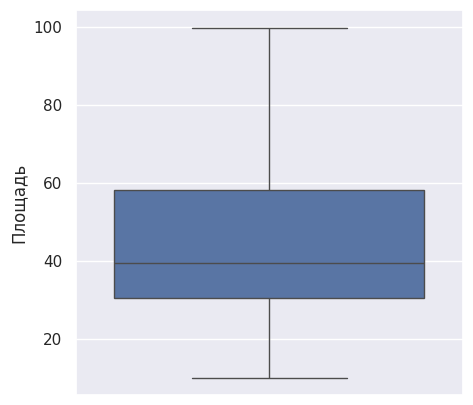

In [60]:
# Посмотрим на распределение переменной площадь квартиры 'Площадь'

sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(df[(df['Площадь']<100) & (df['Площадь']>9.99)]['Площадь'])
plt.show()

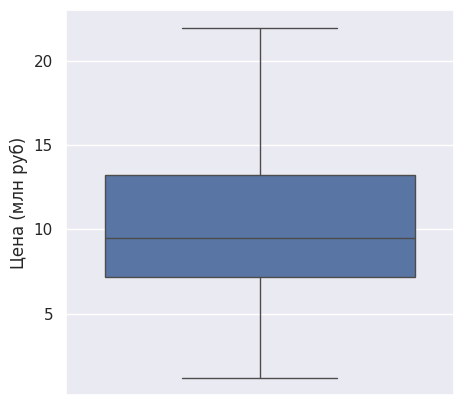

In [61]:
# посмотрим на распределение переменной цена квартиры 'Цена (млн руб)'

sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(df[(df['Цена (млн руб)']<22) & (df['Цена (млн руб)']> 0.99)]['Цена (млн руб)'])
plt.show()

In [62]:
# удаляем данные из датасета, которые выходят за пределы распределения для Цены и Площади квартиры

df=df[(df['Цена (млн руб)']<23) & (df['Цена (млн руб)']> 0.99)&(df['Площадь']<100) & (df['Площадь']>9.99)]

In [63]:
# Посмотрим еще раз на статистику данных. Видно, что теперь значения данных в колонках Цена и Площадь стали разумными
df.describe()

,Цена (млн руб),lat,lng,Срок сдачи,Этаж,Этажей в доме,Площадь,До метро,До центра
count,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000
mean,10.652843,59.914758,30.320995,1732.570566,7.357409,13.112665,41.793395,3.000309,10.679020
std,4.678530,0.090045,0.114265,458.862544,5.375302,6.519818,17.038883,3.518889,5.644496
min,1.200000,59.643833,29.510843,1000.000000,1.000000,1.000000,10.000000,0.054342,0.238733
25%,7.200000,59.846617,30.244814,1000.000000,3.000000,9.000000,29.000000,1.027510,6.209857
50%,9.500000,59.925583,30.333134,2024.000000,6.000000,12.000000,37.600000,1.677049,9.854951
75%,13.370000,59.983844,30.387257,2026.000000,10.000000,17.000000,52.930000,3.281875,13.913287
max,22.991000,60.207919,30.693727,2032.000000,27.000000,36.000000,99.800000,44.596282,53.759579


In [64]:
# снова используем обозначение nan в колонке 'Срок сдачи'
df['Срок сдачи']=df['Срок сдачи'].apply(lambda x: np.nan if x==1000 else x)

In [65]:
# записываем получившийся датасет в файл 'data.csv'.
# этот файл будет использоваться в качестве источника данных для дашборда

df.to_csv('data.csv',
          index=False,
          sep=',',  # Использование запятой в качестве разделителя
          encoding='utf-8-sig',  # Кодировка
         )

In [66]:
# МАШИННОЕ ОБУЧЕНИЕ

In [67]:
# для целей машинного обучения создаем датасет ml - копию датасета df

ml = df.copy()

In [68]:
ml.shape

(9941, 13)

In [69]:
# Удаляем значения nan в колонке 'Срок сдачи'
ml=ml.dropna()
ml['Срок сдачи']=ml['Срок сдачи'].astype(int)
np.sort(ml['Срок сдачи'].unique())
ml.shape

(7143, 13)

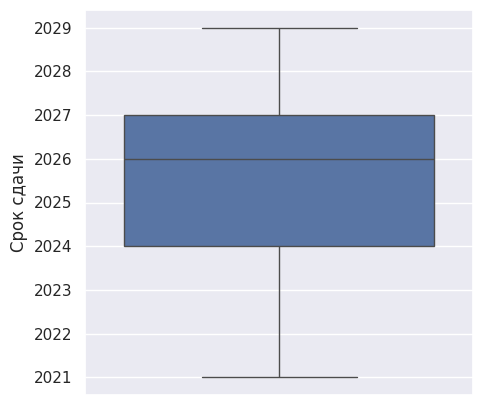

In [70]:
# посмотрим на распределение данных из колонки 'Срок сдачи' на графике ящик с усами(см выше)

sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(ml[(ml['Срок сдачи']>2020) & (ml['Срок сдачи']<2030)]['Срок сдачи'])
plt.show()

In [71]:
# удаляем данные из датасета ml, которые выходят за пределы распределения для 'Срок сдачи'

ml = ml[(ml['Срок сдачи']>2020) & (ml['Срок сдачи']<2030)]
ml.shape

(5742, 13)

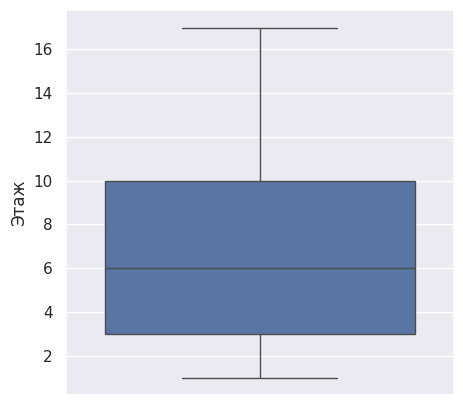

In [72]:
# посмотрим на распределение данных из колонки 'Этаж' на графике ящик с усами

sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(ml[(ml['Этаж']>0) & (ml['Этаж']<18)]['Этаж'])
plt.show()

In [73]:
# удаляем данные из датасета ml, которые выходят за пределы распределения для 'Этаж'

ml = ml[(ml['Этаж']>0) & (ml['Этаж']<18)]
ml.shape

(5354, 13)

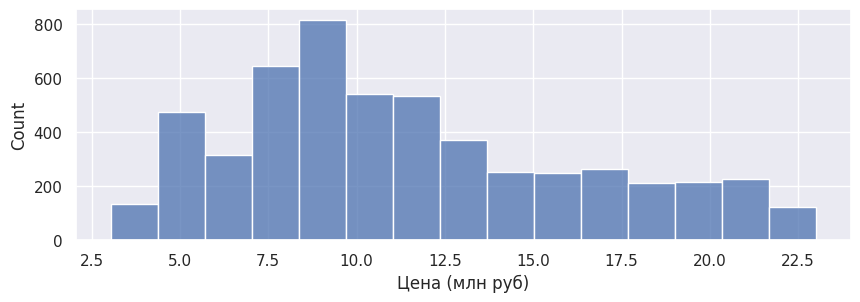

In [74]:
# посмотрим на гистограмму распределения целевой переменной 'Цена (млн руб)'

sns.set(rc={'figure.figsize': (10,3)})
sns.histplot(ml['Цена (млн руб)'], bins=15)
plt.show()

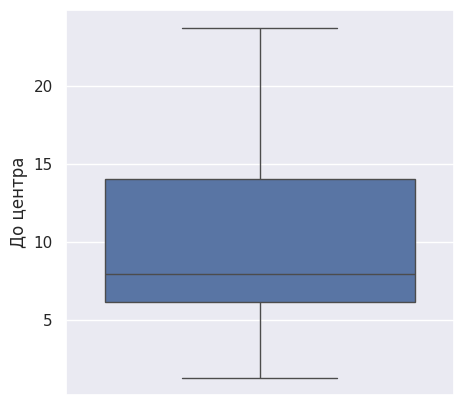

In [75]:
# посмотрим на распределение переменной 'До центра'
sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(ml[ml['До центра']<24]['До центра'])
plt.show()

In [76]:
# удаляем данные из датасета ml, которые выходят за пределы распределения для 'До центра'
ml=ml[ml['До центра']<24]
ml.shape

(5333, 13)

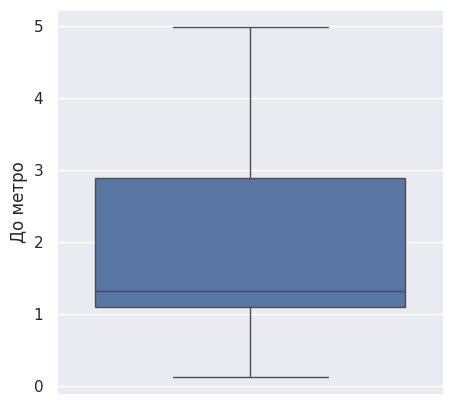

In [77]:
# посмотрим на распределение переменной 'До метро'
sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(ml[ml['До метро']<5]['До метро'])
plt.show()

In [78]:
# удаляем данные из датасета ml, которые выходят за пределы распределения для 'До метро'
ml=ml[ml['До метро']<5]
ml.shape

(4323, 13)

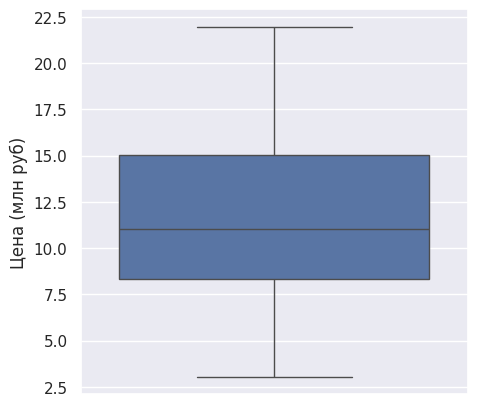

In [79]:
# посмотрим на распределение целевой переменной 'Цена (млн руб)'
sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(ml[(ml['Цена (млн руб)'] > 1.2) & (ml['Цена (млн руб)']<22)]['Цена (млн руб)'])
plt.show()

In [80]:
# удаляем данные из датасета ml, которые выходят за пределы распределения в колонке 'Цена (млн руб)'

ml = ml[(ml['Цена (млн руб)'] > 1.2) & (ml['Цена (млн руб)']<22)]
ml.shape

(4236, 13)

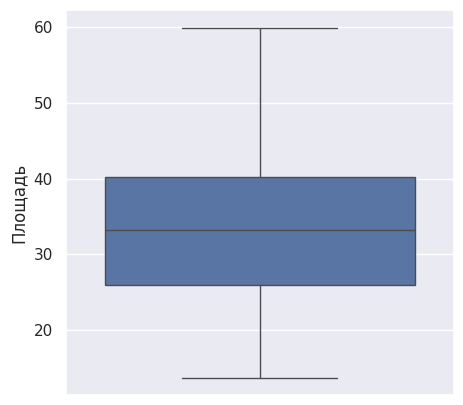

In [81]:
# посмотрим на распределение переменной 'Площадь'
sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(ml[(ml['Площадь'] > 9.99) & (ml['Площадь']<60)]['Площадь'])
plt.show()

In [82]:
# удаляем данные из датасета ml, которые выходят за пределы распределения в колонке 'Площадь'
ml=ml[(ml['Площадь'] > 9.99) & (ml['Площадь']<60)]
ml.shape

(3742, 13)

In [83]:
# посмотрим статистику датасета ml
ml.describe()

,Цена (млн руб),lat,lng,Срок сдачи,Этаж,Этажей в доме,Площадь,До метро,До центра
count,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,10.876811,59.924713,30.326072,2025.828434,7.544361,14.100481,34.486662,1.782957,8.461458
std,3.983376,0.067169,0.092890,2.024169,4.125281,4.699475,10.484994,1.111362,3.495695
min,3.050000,59.804947,30.182821,2021.000000,1.000000,4.000000,13.750000,0.123473,1.327894
25%,8.043750,59.884372,30.245637,2024.000000,4.000000,11.000000,25.900000,0.957043,5.775947
50%,10.298000,59.926297,30.334589,2026.000000,7.000000,13.000000,33.200000,1.292849,7.103419
75%,13.233000,59.943927,30.381027,2028.000000,11.000000,16.000000,40.190000,2.910655,12.139520
max,21.830000,60.086388,30.555140,2029.000000,17.000000,27.000000,59.920000,4.978483,16.976516


In [84]:
# в формализме Машинного обучения все данные должны быть числами (не строками)
# поэтому создаем еще одну копию датасета ml для функций по пересчету строковых переменных в числа
ml1=ml.copy()
ml1= ml1.drop(['Цена (млн руб)', 'Адрес', 'lat', 'lng'], axis=1)
ml1= ml1.drop(['Срок сдачи', 'Этаж','Этажей в доме', 'Площадь'], axis=1)
ml1= ml1.drop(['До метро', 'До центра'], axis=1)
ml1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3742 entries, 64 to 12076
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Вид объекта        3742 non-null   object
 1   Количество комнат  3742 non-null   object
 2   Метро              3742 non-null   object
dtypes: object(3)
memory usage: 116.9+ KB


In [85]:
# создаем функцию для замены количества комнат на целое число

def room_to_index(x):
   ml_index=np.sort(df['Количество комнат'].unique()) # отсортированный массив
   idx = np.where(ml_index == x) # индекс элемента массива х
   return int(idx[0][0])

In [86]:
# создаем функцию для замены названия станции метро на целое число (индекс)

def metro_to_index(x):
   ml_index=np.sort(df['Метро'].unique()) # отсортированный массив
   idx = np.where(ml_index == x) # индекс элемента массива х
   return int(idx[0][0])

In [87]:
# создаем функцию для замены названия типа недвижимости на целое числа (индекс)

def type_to_index(x):
   ml_index=np.sort(df['Вид объекта'].unique()) # отсортированный массив
   idx = np.where(ml_index == x) # индекс элемента массива х
   return int(idx[0][0])

In [88]:
# заменяем названия количества комнат на числа

ml['Количество комнат_int']=ml['Количество комнат'].apply(lambda x:  room_to_index(x))
np.sort(ml['Количество комнат_int'].unique())

array([0, 1, 2, 4])

In [89]:
# заменяем названия станций метро на числа

ml['Метро_int']=ml['Метро'].apply(lambda x:  metro_to_index(x))
np.sort(ml['Метро_int'].unique())

array([ 0,  2,  3,  5,  6,  8,  9, 10, 13, 14, 16, 17, 19, 20, 21, 22, 23,
       24, 25, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 42, 43, 44,
       45, 46, 49, 51, 52, 54, 55, 57, 58, 59, 61, 62, 64])

In [90]:
# заменяем названия видов объектов на числа

ml['Вид объекта_int']=ml['Вид объекта'].apply(lambda x:  type_to_index(x))
np.sort(ml['Вид объекта_int'].unique())


array([0, 1])

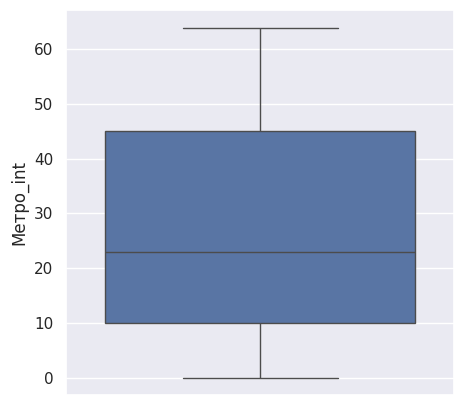

In [91]:
# посмотрим на распределение переменной 'Метро'
sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(ml['Метро_int'])
plt.show()

In [92]:
# удаляем колонки с данными, явно не влияющими на образование цены квартиры

ml= ml.drop(['Адрес','lat','lng', 'До центра', 'Этажей в доме', 'Этаж'], axis=1)
ml.shape

(3742, 10)

In [93]:
# удаляем также колонки со строковыми данными

ml= ml.drop(['Количество комнат','Метро','Вид объекта'], axis=1)
ml.shape

(3742, 7)

In [94]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3742 entries, 64 to 12076
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Цена (млн руб)         3742 non-null   float64
 1   Срок сдачи             3742 non-null   int64  
 2   Площадь                3742 non-null   float64
 3   До метро               3742 non-null   float64
 4   Количество комнат_int  3742 non-null   int64  
 5   Метро_int              3742 non-null   int64  
 6   Вид объекта_int        3742 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 233.9 KB


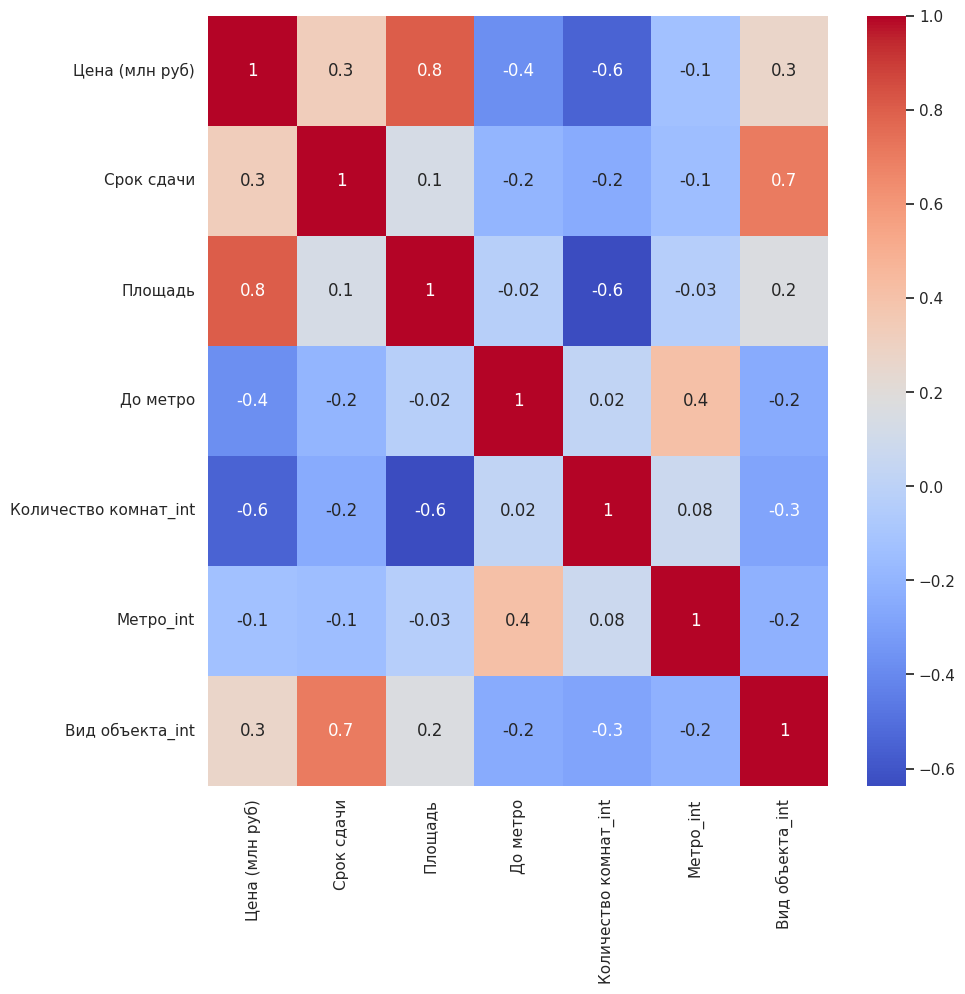

In [95]:
# cтроим матрицу корреляций между всеми признаками

sns.set(rc={'figure.figsize': (10,10)})
sns.heatmap(ml.corr(), annot=True, cmap='coolwarm', fmt='.1g')
plt.show()

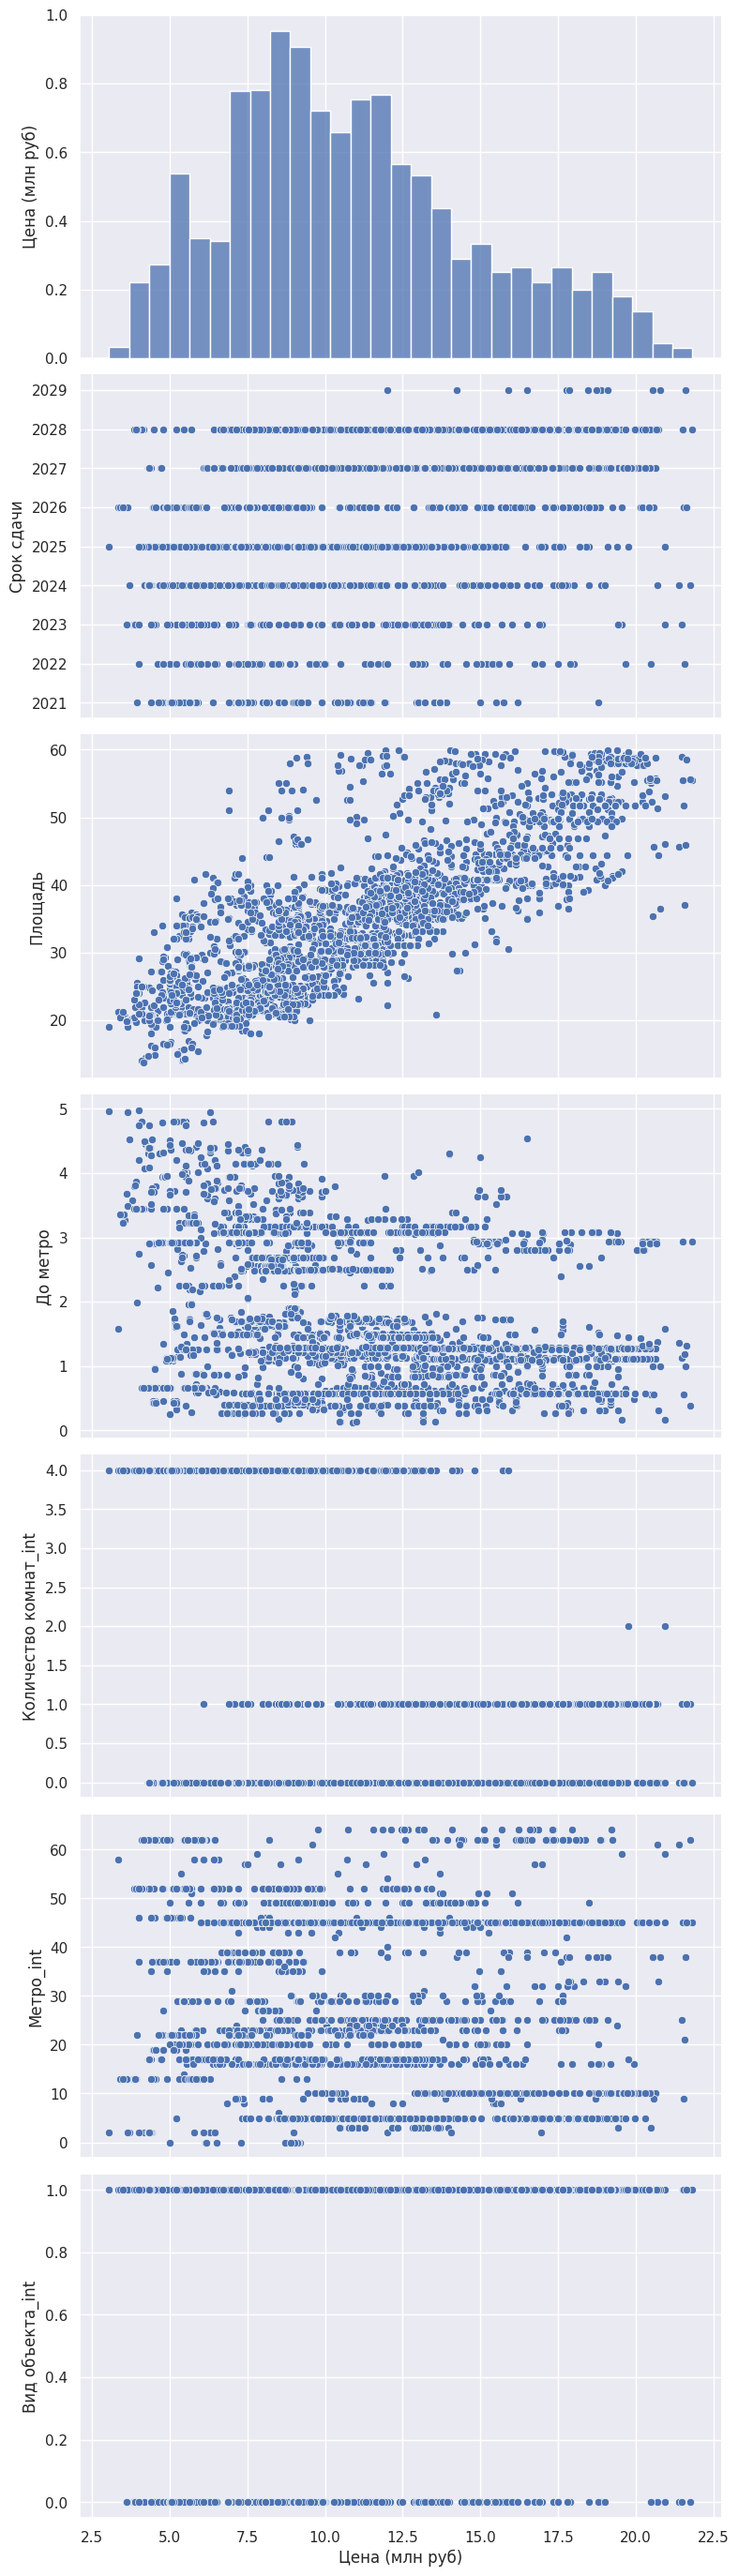

In [96]:
# поиск линейных и нелинейных зависимостей

sns.pairplot(ml, x_vars=['Цена (млн руб)'], height=4, aspect=2) # поиск линейных и нелинейных зависимостей
plt.show()

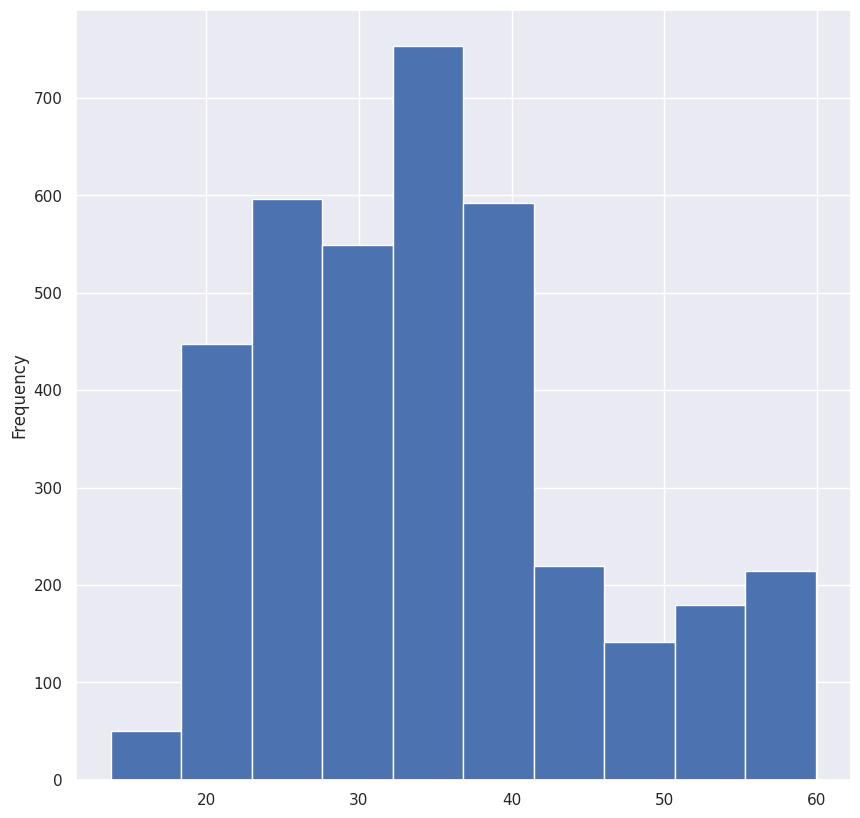

In [97]:
# Построение гистограммы для данных в колонке "Площадь"
ml['Площадь'].plot.hist()

# Отображение гистограммы
plt.show()

In [98]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3742 entries, 64 to 12076
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Цена (млн руб)         3742 non-null   float64
 1   Срок сдачи             3742 non-null   int64  
 2   Площадь                3742 non-null   float64
 3   До метро               3742 non-null   float64
 4   Количество комнат_int  3742 non-null   int64  
 5   Метро_int              3742 non-null   int64  
 6   Вид объекта_int        3742 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 233.9 KB


In [99]:
df.describe()

,Цена (млн руб),lat,lng,Срок сдачи,Этаж,Этажей в доме,Площадь,До метро,До центра
count,9941.000000,9941.000000,9941.000000,7143.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000
mean,10.652843,59.914758,30.320995,2019.527369,7.357409,13.112665,41.793395,3.000309,10.679020
std,4.678530,0.090045,0.114265,21.023677,5.375302,6.519818,17.038883,3.518889,5.644496
min,1.200000,59.643833,29.510843,1777.000000,1.000000,1.000000,10.000000,0.054342,0.238733
25%,7.200000,59.846617,30.244814,2023.000000,3.000000,9.000000,29.000000,1.027510,6.209857
50%,9.500000,59.925583,30.333134,2025.000000,6.000000,12.000000,37.600000,1.677049,9.854951
75%,13.370000,59.983844,30.387257,2027.000000,10.000000,17.000000,52.930000,3.281875,13.913287
max,22.991000,60.207919,30.693727,2032.000000,27.000000,36.000000,99.800000,44.596282,53.759579


In [100]:
ml.describe()

,Цена (млн руб),Срок сдачи,Площадь,До метро,Количество комнат_int,Метро_int,Вид объекта_int
count,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,10.876811,2025.828434,34.486662,1.782957,1.750935,26.673971,0.783805
std,3.983376,2.024169,10.484994,1.111362,1.881257,16.963554,0.411703
min,3.050000,2021.000000,13.750000,0.123473,0.000000,0.000000,0.000000
25%,8.043750,2024.000000,25.900000,0.957043,0.000000,10.000000,1.000000
50%,10.298000,2026.000000,33.200000,1.292849,1.000000,23.000000,1.000000
75%,13.233000,2028.000000,40.190000,2.910655,4.000000,45.000000,1.000000
max,21.830000,2029.000000,59.920000,4.978483,4.000000,64.000000,1.000000


In [101]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


X = ml.drop("Цена (млн руб)", axis=1) # наблюдения по признакам
y = ml["Цена (млн руб)"] # метки


In [102]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=3) # разбиение на выборки тестовую и трейновую

In [103]:
X_test1.shape

(749, 6)

In [104]:
scaler = StandardScaler() # нормализация (приводим к единому масштабу значения)
X = scaler.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) # разбиение на выборки тестовую и трейновую

In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2993, 6), (749, 6), (2993,), (749,))

In [107]:
poly = PolynomialFeatures(degree=3) # кодируем признаки с нелинейными связями
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [108]:
from sklearn.linear_model import Lasso, Ridge

#model = LinearRegression()
#model = Lasso(alpha=0.1)
model = Ridge(alpha=0.7) # строим модель с L2-регуляризацией

In [109]:
model.fit(X_train, y_train) # учим

Ridge(alpha=0.7)

In [110]:
y_pred_train = model.predict(X_train) # предсказываем
y_pred_test = model.predict(X_test)

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_train = r2_score(y_train, y_pred_train) # считаем метрики
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'R2 train: {r2_train}')
print(f'R2 test: {r2_test}')
print(f'MSE train: {mse_train}')
print(f'MSE test: {mse_test}')
print(f'RMSE train: {rmse_train}')
print(f'RMSE test: {rmse_test}')
print(f'MAE train: {mae_train}')
print(f'MAE test: {mae_test}')

R2 train: 0.8917094216118406
R2 test: 0.8699508037738451
MSE train: 1.732629598178097
MSE test: 1.9918900831752901
RMSE train: 1.3162938874651424
RMSE test: 1.411343361190072
MAE train: 0.9054048298809014
MAE test: 0.9063634383853262


In [112]:
X_test1.head(2)

,Срок сдачи,Площадь,До метро,Количество комнат_int,Метро_int,Вид объекта_int
10279,2024,28.30,2.656041,4,45,0
10723,2028,29.81,0.569275,0,5,1


In [113]:
type_building="Новостройка"
#type_building="Вторичка"
station="Приморская"
room="Студия"

In [114]:
metro_to_index(station)

45

In [115]:
example = {
    'Срок сдачи': 2022,
    'Площадь': 40.,
    'До метро': 3.,
    'Количество комнат_int': room_to_index(room),
    'Метро_int': metro_to_index(station),
    'Вид объекта_int':type_to_index(type_building),
    },

In [116]:
# добавляем словарь examle в датафрейм X_test1
X_test1 = pd.concat([X_test1, pd.DataFrame(example)], ignore_index=True)
X_test2 = scaler.fit_transform(X_test1)
X_test2 = poly.transform(X_test2)
result=model.predict(X_test2)[-1]
round(float(result),3)

9.377

In [117]:
X_test1 =  X_test1.iloc[:-1]

In [118]:
X_test1.tail(5)

,Срок сдачи,Площадь,До метро,Количество комнат_int,Метро_int,Вид объекта_int
744,2026,32.16,0.594386,4,23,1
745,2025,35.94,4.141698,0,37,1
746,2028,30.69,0.569275,0,5,1
747,2027,33.88,3.168935,0,49,1
748,2027,33.96,3.168935,0,49,1


In [119]:
X_test1 =  X_test1.iloc[:-1]

In [120]:
# КАРТА

In [121]:
# создаем карту

import folium

m2 = folium.Map(
    location=[59.93, 30.33],
    tiles='openstreetmap',
    zoom_start=11)

In [122]:
# создаем df1 - копию датасета df

df1 = df.copy()

In [123]:
# В колонке координаты широту и долготу точки объединяем в список

df1['Координаты'] = df1['lat'].apply(lambda x: str(x)+',') + df['lng'].apply(lambda x: str(x))
df1["Координаты"] = df1["Координаты"].apply(lambda x: x.split(","))

In [124]:
# создаем тултипы (всплывающие подсказки) для карты

df1["tooltip"]=df1["Площадь"].apply(lambda x: "Площадь (кв м): " + str(x)  + "<br>")
df1["tooltip"]=df1["tooltip"]+df["Количество комнат"].apply(lambda x: "Количество комнат: "+ str(x) + "<br>")
df1["tooltip"]=df1["tooltip"]+df["Этаж"].apply(lambda x: "Этаж: "+ str(x) + "<br>")
df1["tooltip"]=df1["tooltip"]+df["Этажей в доме"].apply(lambda x: "Этажей в доме: "+str(x)+ "<br>")
df1["tooltip"]=df1["tooltip"]+df["Цена (млн руб)"].apply(lambda x: "Цена (млн руб): "+ str(x))
df1["tooltip"].head(5)

,tooltip
0,Площадь (кв м): 45.0<br>Количество комнат: 2<br>Этаж: 4<br>Этажей в доме: 5<br>Цена (млн руб): 6.45
1,Площадь (кв м): 30.0<br>Количество комнат: 1<br>Этаж: 4<br>Этажей в доме: 5<br>Цена (млн руб): 5.5
2,Площадь (кв м): 51.0<br>Количество комнат: 2<br>Этаж: 4<br>Этажей в доме: 9<br>Цена (млн руб): 10.0
3,Площадь (кв м): 24.0<br>Количество комнат: Студия<br>Этаж: 14<br>Этажей в доме: 25<br>Цена (млн руб): 4.7
4,Площадь (кв м): 50.0<br>Количество комнат: 2<br>Этаж: 1<br>Этажей в доме: 5<br>Цена (млн руб): 3.2


In [125]:
# создаем селектор/фильтр согласно выбору параметров
df1 = df1[(df1["Цена (млн руб)"] > 15.) & (df1["Цена (млн руб)"] < 40.) & (df1["Этаж"]==2) ]

In [126]:
# помещаем точки с координатами "Координаты" и тултипы на карту

df1.apply(lambda x: folium.Marker(location=x["Координаты"], tooltip=x["tooltip"]).add_to(m2), axis=1)
m2

In [ ]:
# сохранение карты в html
m2.save('map2.html')